In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [103]:
freq = "2H"

min    max  mean  jitter  n_threshold      n  \
day     hour minute                                                  
Monday  12   0       15.0  391.8  34.2    30.1          212   4800   
        14   0       15.0  425.3  35.3    30.8         1683  38800   
        16   0       15.0  404.3  35.6    29.0         1588  36500   
        18   0       21.0  407.0  34.5    25.0          197   5000   
        20   0       14.0  412.3  36.0    27.6         1017  23300   
        22   0       15.0  426.5  38.0    29.3         1727  38200   
Tuesday 0    0       15.0  430.0  41.2    33.5         1763  37500   
        2    0       14.5  433.0  42.4    33.7         1799  37400   
        4    0       15.0  411.0  42.2    31.4         1764  37300   
        6    0       15.0  429.0  42.6    30.1         1764  37200   
        8    0       15.0  420.8  43.5    29.5         1742  37100   
        10   0       14.0  412.5  38.8    30.6         1681  37400   
        12   0       15.0  414.8  35.5    30.2         1679  38700   
        14   0       15.5  403.3  35.7    28.1         1678  38700   
        16   0       21.3  401.8  35.8    26.9          770  18000   

                     pct_above_threshold  
day     hour minute                       
Monday  12   0                      4.42  
        14   0                      4.34  
        16   0                      4.35  
        18   0                      3.94  
        20   0                      4.36  
        22   0                      4.52  
Tuesday 0    0                      4.70  
        2    0                      4.81  
        4    0                      4.73  
        6    0                      4.74  
        8    0                      4.70  
        10   0                      4.49  
        12   0                      4.34  
        14   0                      4.34  
        16   0                      4.28

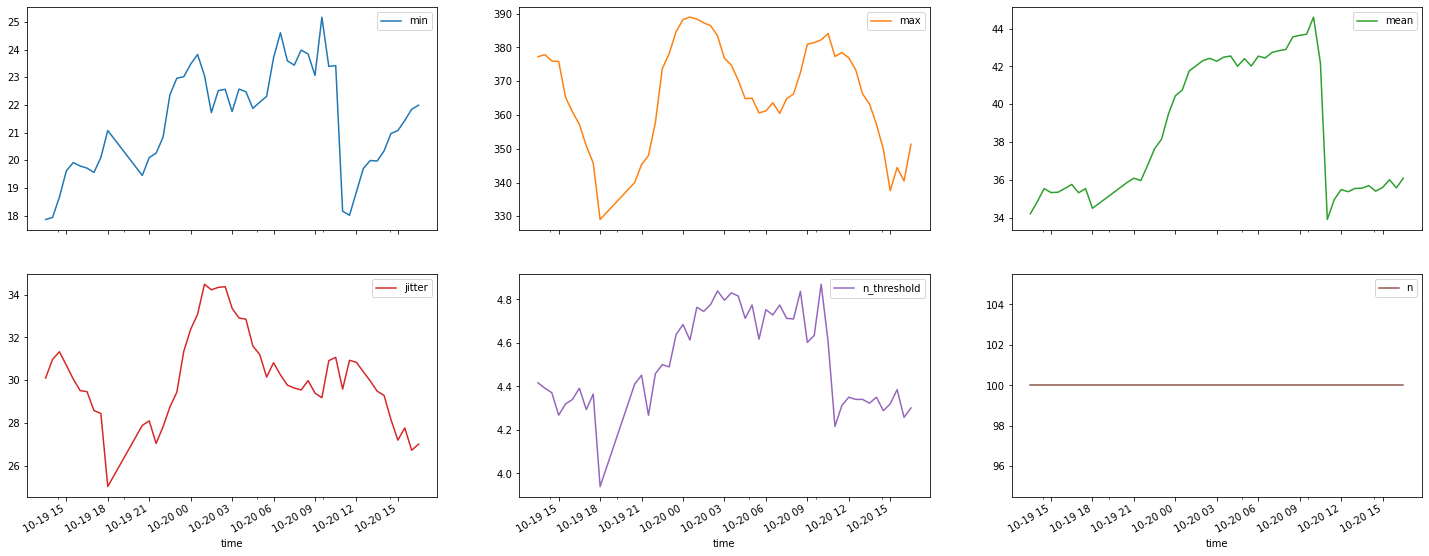

In [147]:
ping_data = pd.read_csv(
    "league_ping_data.csv",
    header=None,
    names=["time", "min", "max", "mean", "jitter", "n_threshold", "n"],
    index_col="time",
)
ping_data.groupby(
    by=[pd.DatetimeIndex(ping_data.index).floor("30 min").rename("time"),]
).mean().plot(subplots=True, figsize=(25, 10), layout=(2, 3))
summary_df = ping_data.groupby(
    by=[
        pd.DatetimeIndex(ping_data.index).floor(freq).day_name().rename("day"),
        pd.DatetimeIndex(ping_data.index).floor(freq).hour.rename("hour"),
        pd.DatetimeIndex(ping_data.index).floor(freq).minute.rename("minute"),
    ]
).agg(
    {
        "min": "min",
        "max": "max",
        "mean": "mean",
        "jitter": "mean",
        "n_threshold": "sum",
        "n": "sum",
    }
)
summary_df["pct_above_threshold"] = 100 * summary_df["n_threshold"] / summary_df["n"]
summary_df.round({"min": 1, "max": 1, "mean": 1, "jitter": 1, "pct_above_threshold": 2})